In [1]:
import staircase as sc
from imports import *
from datetime import datetime,timedelta
%matplotlib inline
import operator
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"../data/page_views.csv")

vsteps = Steps.read_dataframe(df,'start','ends')

df.shape

(947, 3)

<AxesSubplot:>

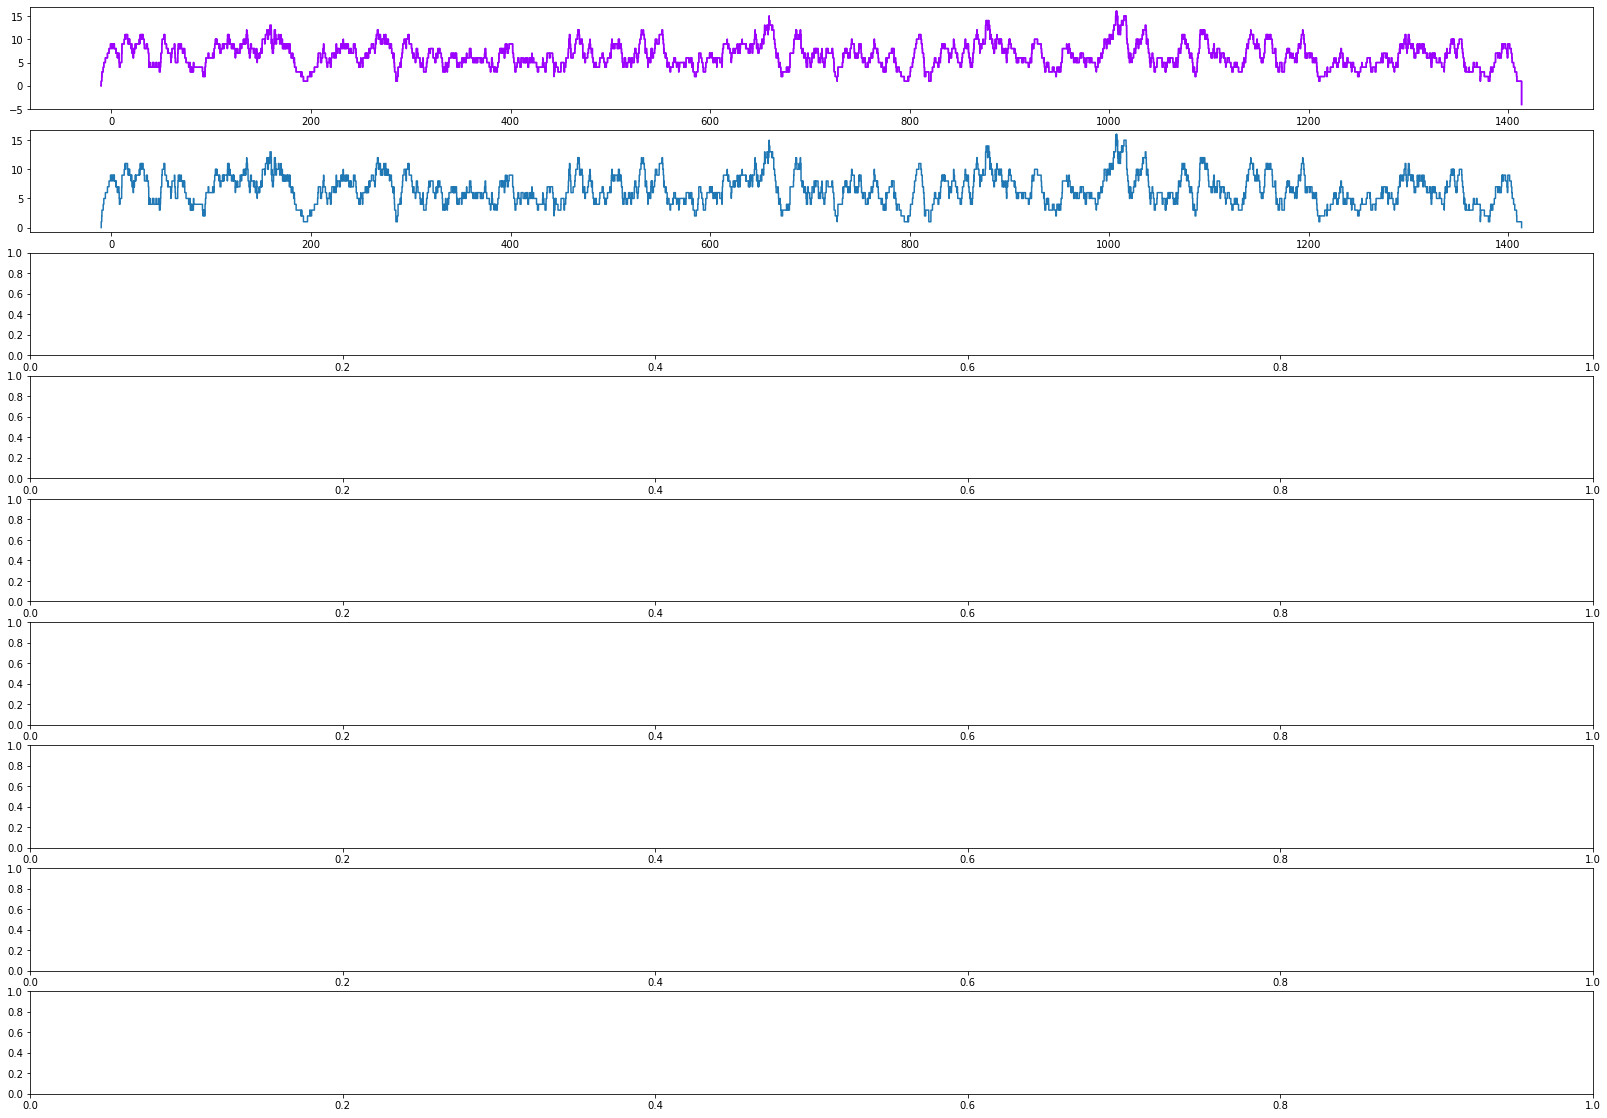

In [3]:
p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=9,figsize=(28,20))

st,se,span = vsteps.span()

#error here, this isn't the same as Step() - Step(start=st+0.5*span,weight=2)
haar0 = Step(end=st+0.5*span)
haar00 = Step(end=st+0.5*span,weight=1) - Step(start=st+0.5*span,weight=2)

haar = Step() - Step(start=st+0.5*span,weight=2)

#print(haar0,'| - |',haar)
#vsteps.rebase(tbase)
#vs_clip = vsteps.clip(500.0,550.0)

vsteps.plot(ax=ax[0])
#vsteps.smooth_plot(ax=ax[0],color='g')

queue = sc.Stairs().layer(df.start, df.ends)
queue.plot(ax[1])

# (vsteps>7).plot(ax=ax[1],color='r')


# vs_clip.plot(ax=ax[2])
# vs_clip.smooth_plot(ax=ax[2],color='g')
# vs_clip.normalise().plot(ax=ax[2],color='r')

#vs_clip._operate_norm_new(0,operator.ne).plot(ax=ax[2],color='r')
# vsteps.histogram_plot(ax=ax[6],kind='bar')
# xx = vsteps.pacf_plot(10,ax=ax[3],kind='bar')
# xx.axhline(0,c='black',linestyle=':')
# vsteps.ecdf_plot(ax=ax[4],kind='bar')

# (vs_clip>7).plot(ax=ax[3])
# (vs_clip>7).normalise().plot(ax=ax[3],color='r')

# vs_clip.plot(ax=ax[4])
# (vs_clip>7).plot(ax=ax[4],color='r')
#vs_clip._operate_value_new(7,operator.gt).plot(ax=ax[4],color='g')

# vs_clip.plot(ax=ax[5])
# (vs_clip>7).plot(ax=ax[5],color='r')
# t = np.arange(-100.0,1500.0,0.1)
# t2 = np.arange(490.0,520.0,0.1)

# (vsteps*haar).plot(ax=ax[7])
# (vsteps*haar).smooth_plot(ax=ax[7],color='g',ts_grain=0.5,smooth_factor=15)

# axx = vs_clip.plot()
# (vs_clip>7).plot(ax=axx,color='r')
#vs_clip..plot(ax=axx,color='g')

In [ ]:

from itertools import groupby

vclip7 = (vs_clip>7)

all_keys = [s.start() for s in vclip7.steps()]
all_values = vclip7.step(all_keys)

mask = np.where(all_values > 7, True,False)

groups = [(group[0],group[-1]) for group in (list(group) for key, group in groupby(range(len(mask)), key=mask.__getitem__) if key)]
vclip7.steps()[41]

In [ ]:
h = Step(900)
h2 = Step(820)
h3 = Step(end=800)
ss = Step(850,950)

ax = h.plot()
h2.plot(ax=ax,color='g')
h3.plot(ax=ax,color='blue',linestyle=':')
ss.plot(ax=ax,color='r')


In [ ]:
dat = [900,920,930]
ss(dat)